# Deep logistic regression

In [11]:
import matplotlib.pyplot as plt
import numpy as np

* Method used to generate the dataset

In [3]:
def get_dataset():
    """
        Method used to generate the dataset
    """
    # Numbers of row per class
    row_per_class = 100
    # Generate rows
    sick = np.random.randn(row_per_class, 2) + np.array([-2, -2])
    sick_2 = np.random.randn(row_per_class, 2) + np.array([2, 2])

    healthy = np.random.randn(row_per_class, 2) + np.array([-2, 2])
    healthy_2 = np.random.randn(row_per_class, 2) + np.array([2, -2])

    features = np.vstack([sick, sick_2, healthy, healthy_2])
    targets = np.concatenate((np.zeros(row_per_class * 2), np.zeros(row_per_class * 2) + 1))

    return features, targets

 * Init model variables (weights and bias)

In [5]:
def init_variables(nb_features, hidden_layer_size):
    """
        Init model variables (weights and bias)
        **input: **
            *nb_features: (Integer) Numbers of inputs/features
            *hidden_layer_size: (Integer) Numbers of Unit in the hidden layer
    """
    w1 = np.random.randn(nb_features, hidden_layer_size)
    b1 = np.zeros(hidden_layer_size)

    w2 = np.random.randn(hidden_layer_size)
    b2 = np.zeros(1)

    return w1, b1, w2, b2

* Activation/Sigmoid

In [6]:
def activation(z):
    """
        Activation/Sigmoid
        **input: **
            *z: (Integer|Numpy Array)
    """
    return 1 / (1 + np.exp(-z))


def derivative_activation(z):
    """
        Derivative of the activation/Sigmoid
        **input: **
            *z: (Integer|Numpy Array)
    """
    return activation(z) * (1 - activation(z))


def pre_activation(features, weights, bias):
    """
        Compute the pre activation
        **input: **
            *features: (Numpy Matrix)
            *weights: (Numpy vector)
            *bias: (Integer)
    """
    return np.dot(features, weights) + bias

* Predict the class and

In [7]:
def class_predict(features, w1, b1, w2, b2):
    """
        Predict the class
        **input: **
            *features: (Numpy Matrix)
            *w1: (Numpy Matrix)
            *b1: (Numpy vector)
            *w2: (Numpy vector)
            *b2: (Numpy scalar)
        **reutrn: (Numpy vector)**
            *0 or 1
    """
    z1 = pre_activation(features, w1, b1)
    a1 = activation(z1)
    z2 = pre_activation(a1, w2, b2)
    y = activation(z2)
    return np.round(y)


def y_predict(features, w1, b1, w2, b2):
    """
        Predict the probability
        **input: **
            *features: (Numpy Matrix)
            *w1: (Numpy Matrix)
            *b1: (Numpy vector)
            *w2: (Numpy vector)
            *b2: (Numpy scalar)
        **reutrn: (Numpy vector)**
            *0 or 1
    """
    z1 = pre_activation(features, w1, b1)
    a1 = activation(z1)
    z2 = pre_activation(a1, w2, b2)
    y = activation(z2)
    return y

* the cost of the model

In [8]:
def cost(predictions, targets):
    """
        Compute the cost of the model
        **input: **
            *predictions: (Numpy vector) y
            *targets: (Numpy vector) t
    """
    return np.mean((predictions - targets) ** 2)

* Method used to train the model using the gradient descent method

In [9]:
def train(features, targets, w1, b1, w2, b2):
    """
        Method used to train the model using the gradient descent method
        **input: **
            *features: (Numpy Matrix)
            *targets: (Numpy vector)
            *w1: (Numpy Matrix)
            *b1: (Numpy vector)
            *w2: (Numpy vector)
            *b2: (Numpy scalar)
        **return (Numpy vector, Numpy vector) **
            *update weights
            *update bias
    """
    epochs = 100
    learning_rate = 0.1

    # Print current Accuracy
    predictions = class_predict(features, w1, b1, w2, b2)
    print("Accuracy = %s" % np.mean(predictions == targets))

    # Plot points
    plt.scatter(features[:, 0], features[:, 1], s=40, c=targets, cmap=plt.cm.Spectral)
    plt.show()

    for epoch in range(epochs):
        # Compute and display the cost every 10 epoch
        if epoch % 10 == 0:
            predictions = y_predict(features, w1, b1, w2, b2)
            print("Current cost = %s" % cost(predictions, targets))

        # Init gragients
        w1_gradients = np.zeros(w1.shape)
        b1_gradients = np.zeros(b1.shape)
        w2_gradients = np.zeros(w2.shape)
        b2_gradients = np.zeros(b2.shape)
        # Go through each row
        for feature, target in zip(features, targets):
            # Compute prediction
            z1 = pre_activation(feature, w1, b1)
            a1 = activation(z1)
            z2 = pre_activation(a1, w2, b2)
            y = activation(z2)
            # Compute the error term
            error_term = (y - target)
            # Compute the error term for the output layer
            error_term_output = error_term * derivative_activation(z2)
            # Compute the error_term for the hidden layer
            error_term_hidden = error_term_output * w2 * derivative_activation(z1)
            # Update gradients
            w1_gradients += error_term_hidden * feature[:, None]
            b1_gradients += error_term_hidden
            w2_gradients += error_term_output * a1
            b2_gradients += error_term_output
        # Update variables
        w1 = w1 - (learning_rate * w1_gradients)
        b1 = b1 - (learning_rate * b1_gradients)
        w2 = w2 - (learning_rate * w2_gradients)
        b2 = b2 - (learning_rate * b2_gradients)
    # Print current Accuracy
    predictions = class_predict(features, w1, b1, w2, b2)
    print("Accuracy = %s" % np.mean(predictions == targets))


In [ ]:
*Test 

Accuracy = 0.4925


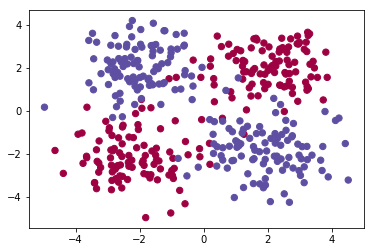

Current cost = 0.2749014986347773
Current cost = 0.2891046152981812
Current cost = 0.29953166586784247
Current cost = 0.16607920272874846
Current cost = 0.07161046537764627
Current cost = 0.06424721502119811
Current cost = 0.0613844736698699
Current cost = 0.05985441832770941
Current cost = 0.05886037690824885
Current cost = 0.058143187073663435
Accuracy = 0.9225


In [10]:
# Dataset
features, targets = get_dataset()
    # Variables
w1, b1, w2, b2 = init_variables(2, 3)
    # Train the model
train(features, targets, w1, b1, w2, b2)